In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [3]:
# Cargamos la base de datos Titanic
data = pd.read_csv("./data/Titanic.csv")

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
706,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
707,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
708,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
709,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Eliminar las columnas no relevantes
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [6]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
706,0,3,female,39.0,0,5,29.1250
707,0,2,male,27.0,0,0,13.0000
708,1,1,female,19.0,0,0,30.0000
709,1,1,male,26.0,0,0,30.0000


In [7]:
# Convertir los valores de sexo a numéricos
data['Sex'] = pd.factorize(data['Sex'])[0]

In [8]:
# Eliminar las filas con valores faltantes
data = data.dropna()

In [9]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1), data['Survived'], test_size=0.2)

In [10]:
# Entrenar un modelo de árbol de decisión
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = clf.predict(X_test)

In [12]:
# Calcular la matriz de confusión y la precisión
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [13]:
print("Matriz de confusión:")

Matriz de confusión:


In [14]:
print(cm)

[[64 19]
 [22 38]]


In [15]:
print("Precisión: {:.2f}%".format(accuracy * 100))

Precisión: 71.33%


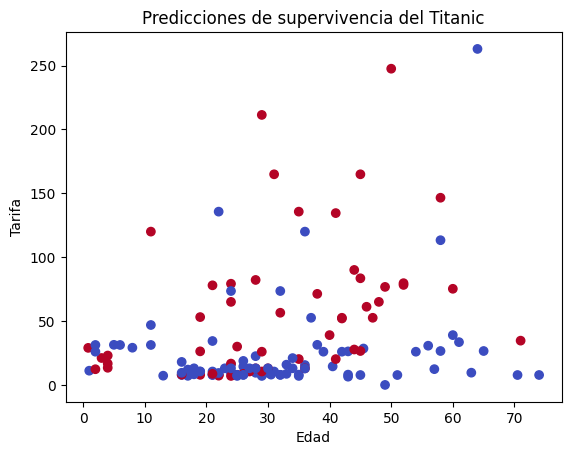

In [16]:
# Graficar las predicciones
plt.scatter(X_test['Age'], X_test['Fare'], c=y_pred, cmap='coolwarm')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Predicciones de supervivencia del Titanic')
plt.show()

En este ejemplo, primero cargamos los datos del Titanic desde un archivo CSV y eliminamos las columnas no relevantes. Convertimos los valores de sexo a numéricos y eliminamos las filas con valores faltantes. Dividimos los datos en conjuntos de entrenamiento y prueba y entrenamos un modelo de árbol de decisión. Realizamos predicciones sobre el conjunto de prueba y calculamos la matriz de confusión y la precisión. Por último, graficamos las predicciones de supervivencia en función de la edad y la tarifa pagada.

Este es solo un ejemplo básico de cómo se puede utilizar Scikit-learn para realizar un análisis de datos y una predicción de supervivencia en el Titanic. Hay muchos detalles más avanzados que se pueden explorar, como la optimización de hiperparámetros, la selección de diferentes algoritmos de clasificación y la visualización de los resultados de la predicción. Espero que esto te haya dado una idea de cómo se pueden utilizar las herramientas de Python para el análisis de datos y la predicción de supervivencia en el Titanic.